#  Importing Libraries & Loading Data
This section imports necessary Python libraries and loads the sales data files.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import style
from itertools import combinations
from collections import Counter

##  Merging all monthly sales CSV files
We loop through the data folder, read individual monthly files, and combine them into one dataset.

In [2]:
files = {file for file in os.listdir('./Sales_Data')}

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)
all_data = pd.read_csv("all_data.csv")

## Cleaning the Data
- Remove missing rows
- Remove invalid rows
- Convert columns to numeric types

In [3]:
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

all_data['Months'] = all_data['Order Date'].str[0:2].astype('int32')

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

##  Question 1: Best Month for Sales
We calculate total revenue per month and visualize it.

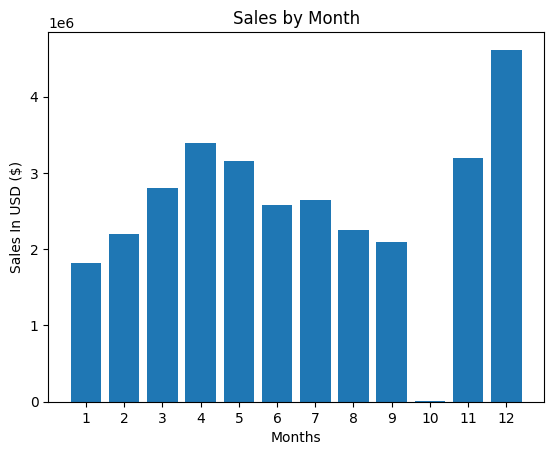

In [4]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
result = all_data.groupby('Months').sum()

months = range(1,13)
plt.bar(months, result['Sales'])
plt.xticks(months)
plt.ylabel("Sales In USD ($)")
plt.xlabel("Months")
plt.title("Sales by Month")
plt.show()

## Question 2: Which City had the Highest Sales?
We extract city/state from address column and analyze sales by city.

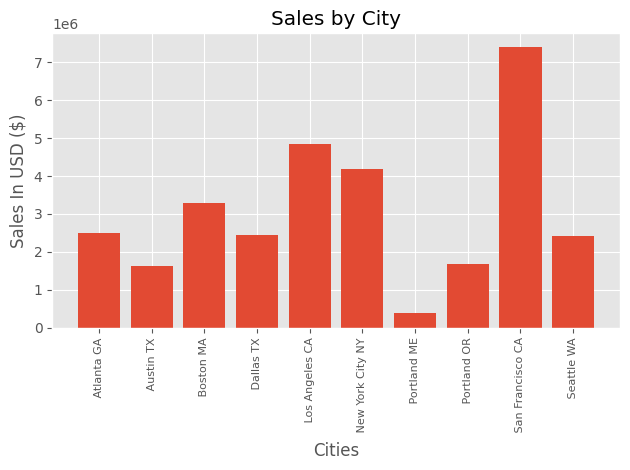

In [6]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

city_results = all_data.groupby('City').sum()

cities = [city for city, df in all_data.groupby('City')]

style.use('ggplot')
plt.bar(cities, city_results['Sales'])
plt.xticks(rotation='vertical', size=8)
plt.ylabel("Sales In USD ($)")
plt.xlabel("Cities")
plt.title("Sales by City")
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 3: Best Time to Display Advertisements
We analyze purchase timestamps to find peak shopping hours.

C:\Users\obuba\AppData\Local\Temp\ipykernel_13356\4175924426.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


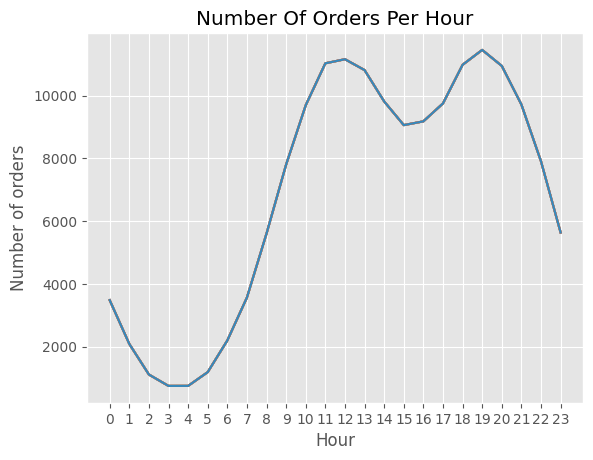

In [7]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour']= all_data['Order Date'].dt.hour

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.title('Number Of Orders Per Hour')
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.xticks(hours)
plt.show()

## Question 4: What Products are Sold Together?
We identify products frequently bought in the same order.

In [8]:
duplicate_df = all_data[all_data['Order ID'].duplicated(keep=False)]
duplicate_df['Grouped'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

duplicate_df = duplicate_df[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()
for row in duplicate_df['Grouped']:
   row_list = row.split(',')
   count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
   print(key,value)

('iPhone', 'Lightning Charging Cable') 913
('Google Phone', 'USB-C Charging Cable') 882
('iPhone', 'Wired Headphones') 390
('Google Phone', 'Wired Headphones') 360
('Vareebadd Phone', 'USB-C Charging Cable') 320
('iPhone', 'Apple Airpods Headphones') 319
('Google Phone', 'Bose SoundSport Headphones') 187
('USB-C Charging Cable', 'Wired Headphones') 143
('Vareebadd Phone', 'Wired Headphones') 127
('Lightning Charging Cable', 'Wired Headphones') 78


C:\Users\obuba\AppData\Local\Temp\ipykernel_13356\2365029592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_df['Grouped'] = duplicate_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


## Question 5: Which Product Sold the Most and Why?
We analyze quantity ordered for each product.

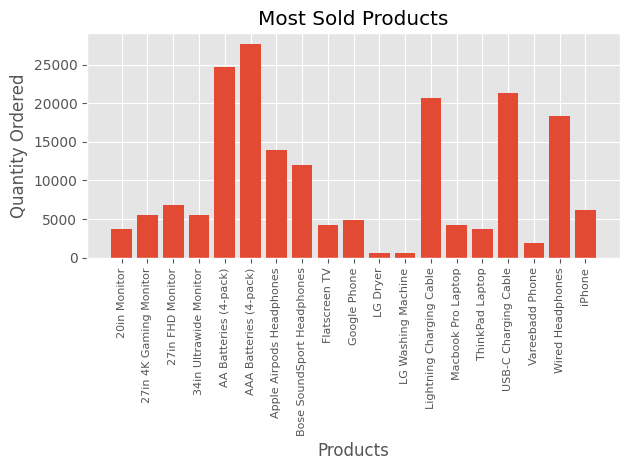

In [10]:
products_group = all_data.groupby('Product')
quantity_ordered = products_group['Quantity Ordered'].sum()

products = [product for product, df in products_group]

plt.bar(products, quantity_ordered)
plt.xticks(rotation='vertical', size=8)
plt.ylabel("Quantity Ordered")
plt.xlabel("Products")
plt.title("Most Sold Products")
plt.grid(True)
plt.tight_layout()
plt.show()